In [ ]:
Market Basket Analysis: Apriori Algorithm 
Dataset: Order3.csv
The dataset has 20507 rows and 5 columns of the purchase orders of people from 
the bakery. These orders can be analysed, and association rules can be generated 
using Market Basket Analysis by algorithms like Apriori Algorithm.
Follow following steps:
a. Data Pre-processing
b. Generate the list of transactions from the dataset
c. Train Apriori algorithm on the dataset
d. Visualize the list of rules

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Oder3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [6]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [7]:
transaction = data.groupby('TransactionNo')['Items'].apply(list).tolist()

In [9]:
te = TransactionEncoder()
te_arry = te.fit(transaction).transform(transaction)
df = pd.DataFrame(te_arry,columns=te.columns_)

In [10]:
frequent_items = apriori(df,min_support=0.02,use_colnames=True)


In [11]:
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [12]:
print('Frequent Item')
print(frequent_items)

Frequent Item
     support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Cake, Bread)
20  0.090016          (Coffee, Bread)
21  0.029160          (Pastry, Bread)
22  0.028104             (Tea, Bread)
23  0.054728           (Cake, Coffee)
24  0.023772              (Cake, Tea

In [13]:
print('Rules')
print(rules)

Rules
        antecedents      consequents  antecedent support  ...  leverage  conviction  zhangs_metric
0          (Pastry)          (Bread)            0.086107  ...  0.000985    1.017305       0.036980
1           (Bread)         (Pastry)            0.327205  ...  0.000985    1.003306       0.050231
2            (Cake)         (Coffee)            0.103856  ...  0.005044    1.102664       0.102840
3          (Coffee)           (Cake)            0.478394  ...  0.005044    1.011905       0.176684
4            (Cake)            (Tea)            0.103856  ...  0.008959    1.111865       0.420538
5             (Tea)           (Cake)            0.142631  ...  0.008959    1.075372       0.439556
6         (Cookies)         (Coffee)            0.054411  ...  0.002179    1.083174       0.081700
7          (Coffee)        (Cookies)            0.478394  ...  0.002179    1.004841       0.148110
8   (Hot chocolate)         (Coffee)            0.058320  ...  0.001683    1.058553       0.060403
9   

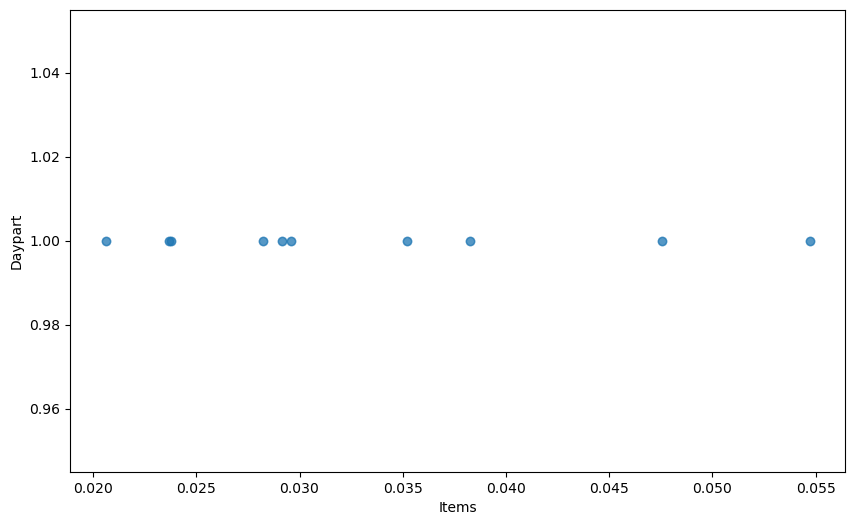

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(rules['support'],rules['antecedents'].apply(len),alpha=0.5)
plt.title('Items vs. Daypart')
plt.xlabel('Items')
plt.ylabel('Daypart')
plt.show()